**Корнеев Роман Александрович**

*М80-304Б-17*

<center> <h2> Датасет для классификации </h2></center>
<center> <h4> Копия из первой лабораторной работы с добавленным сохранением очищенных данных </h4></center>

In [1]:
! pip install mlxtend -q

In [2]:
! pip install jupyterthemes -q

In [3]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
from jupyterthemes import jtplot
matplotlib.rcParams['figure.figsize'] = (15,10)
jtplot.style('onedork')

#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [4]:
#Loading the dataset
diabetes_data = pd.read_csv('./input/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Статистический анализ


In [5]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Опишем данные с **DataFrame.describe()**:

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00




### Следствие из описания

#### Может ли минимальное значение нижеперечисленных столбцов быть равно нулю (0)?

В этих столбцах нулевое значение не имеет смысла и, таким образом, указывает на пропущенное значение.

Следующие столбцы или переменные имеют недопустимое нулевое значение:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

#### Лучше заменить нули на nan, так как после этого подсчет их будет проще, и нули нужно заменить подходящими значениями:

In [8]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64




#### Чтобы заменить эти Nan значения, необходимо понять распределение данных:

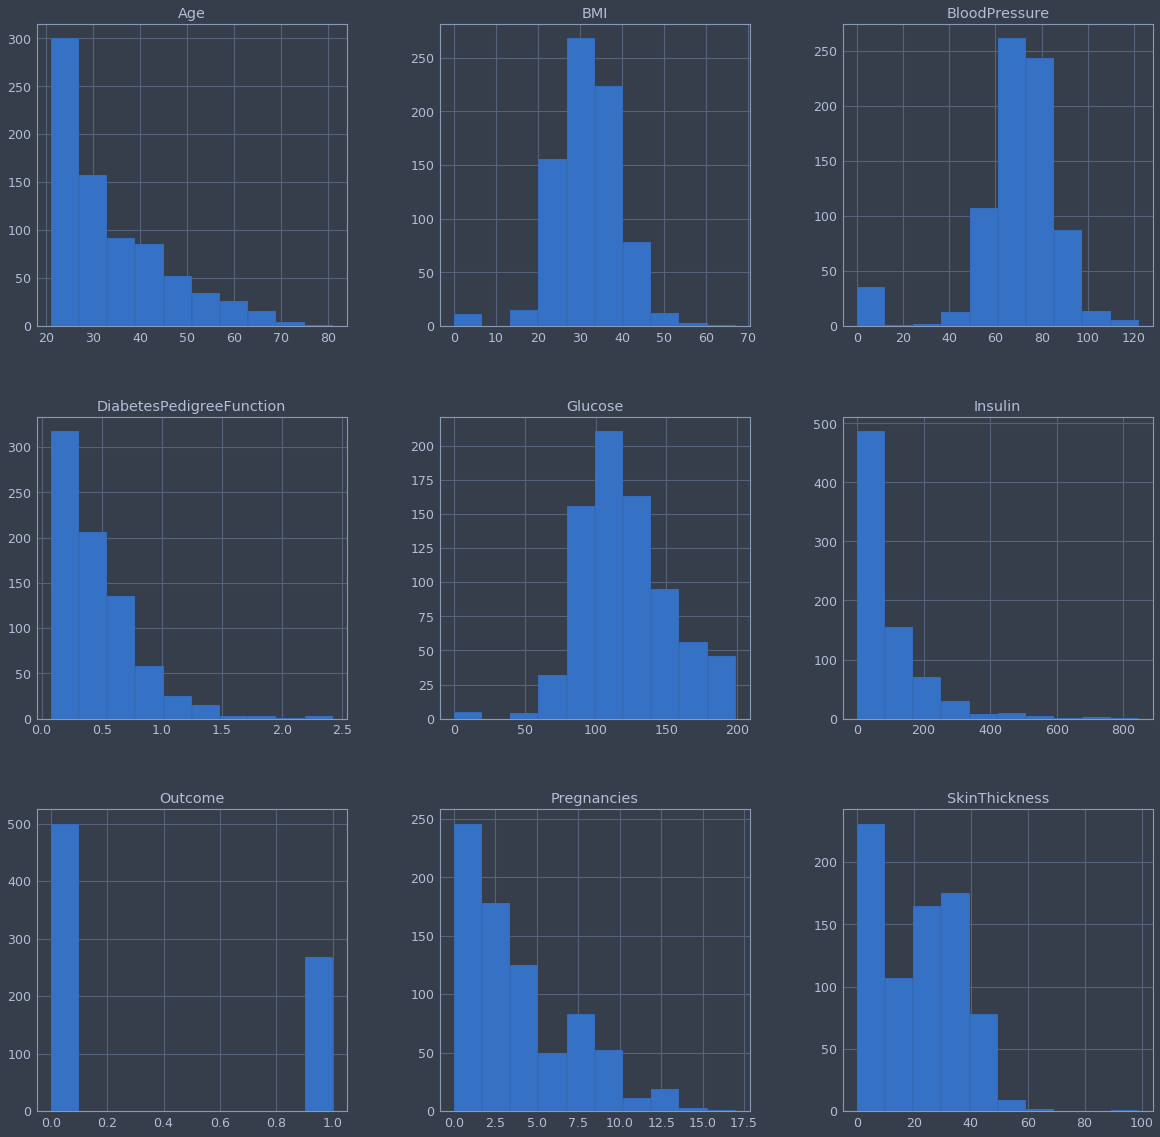

In [9]:
p = diabetes_data.hist(figsize = (20,20))

#### Заменим значения nan для столбцов в соответствии с их распределением:

In [10]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)


### Построение графика после удаления Nan

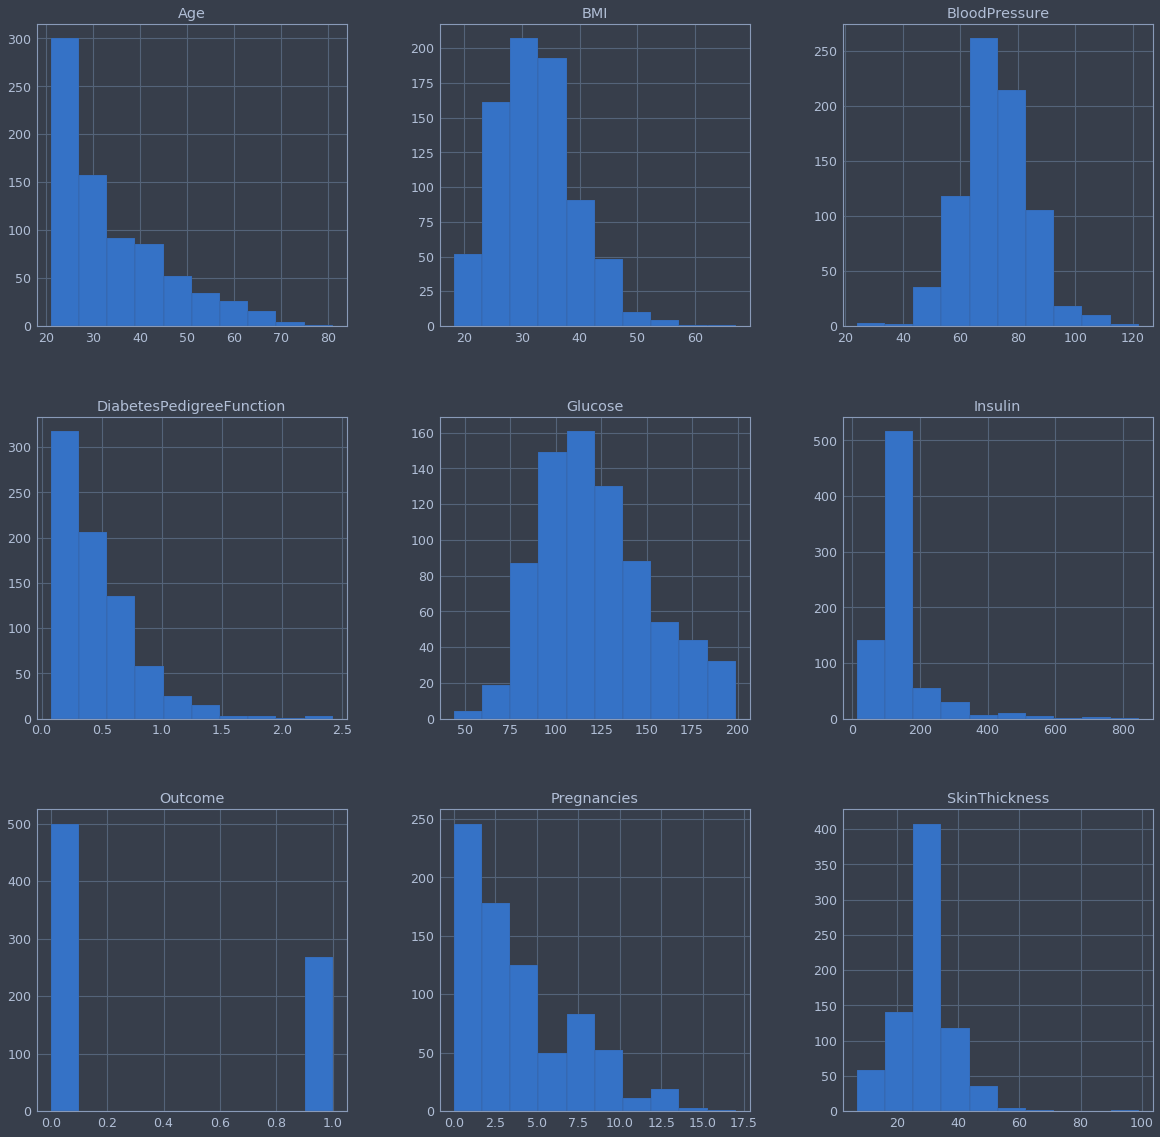

In [11]:
p = diabetes_data_copy.hist(figsize = (20,20))

In [12]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

In [13]:
! pip install missingno -q

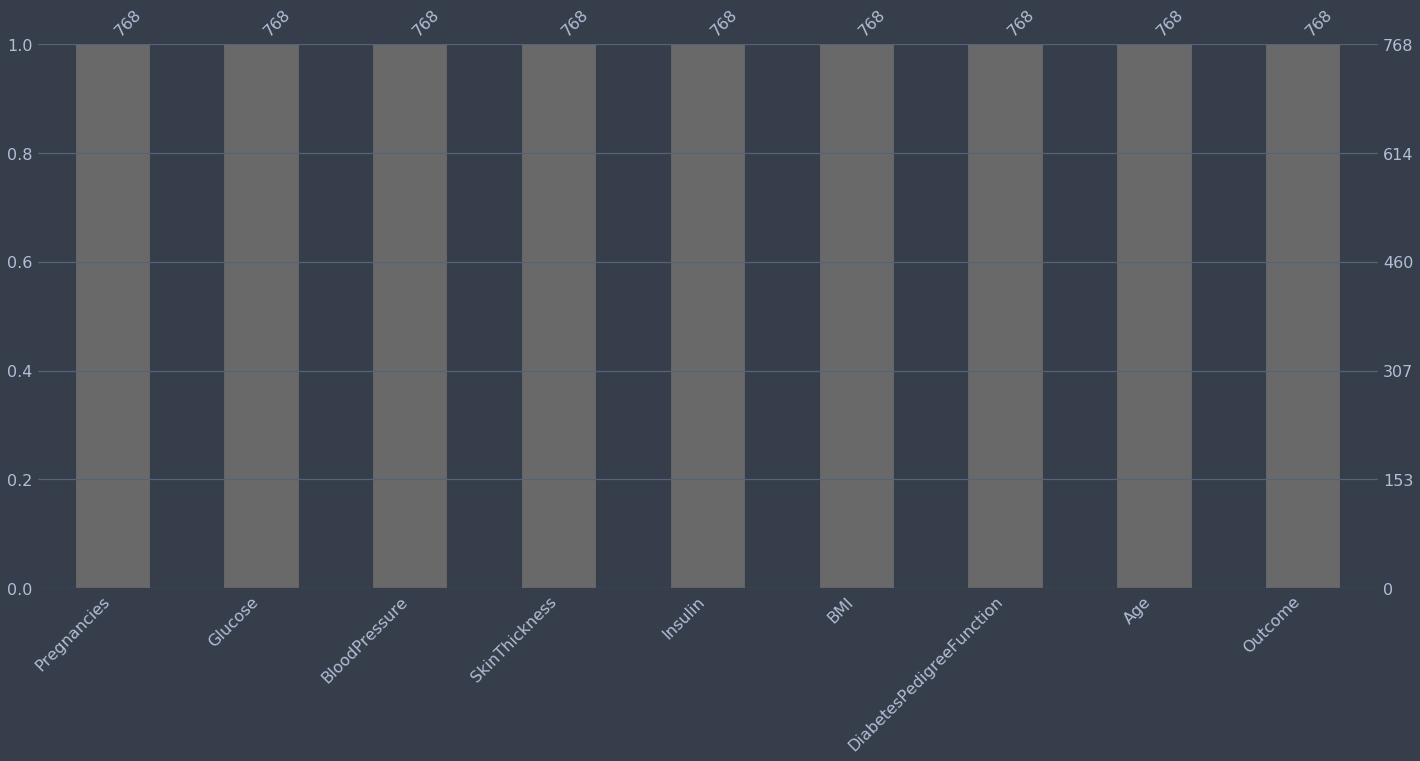

In [14]:
## null count analysis
import missingno as msno
p=msno.bar(diabetes_data)


0    500
1    268
Name: Outcome, dtype: int64


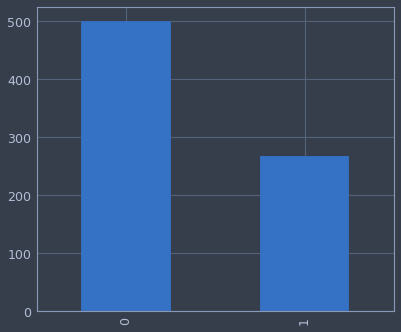

In [15]:
## checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")




####  Приведенный выше график показывает, что данные смещены в сторону точек, имеющих значение целевой переменной -  0. Это означает, что диабет на самом деле не присутствовал. Число недиабетиков почти в два раза превышает число больных сахарным диабетом.

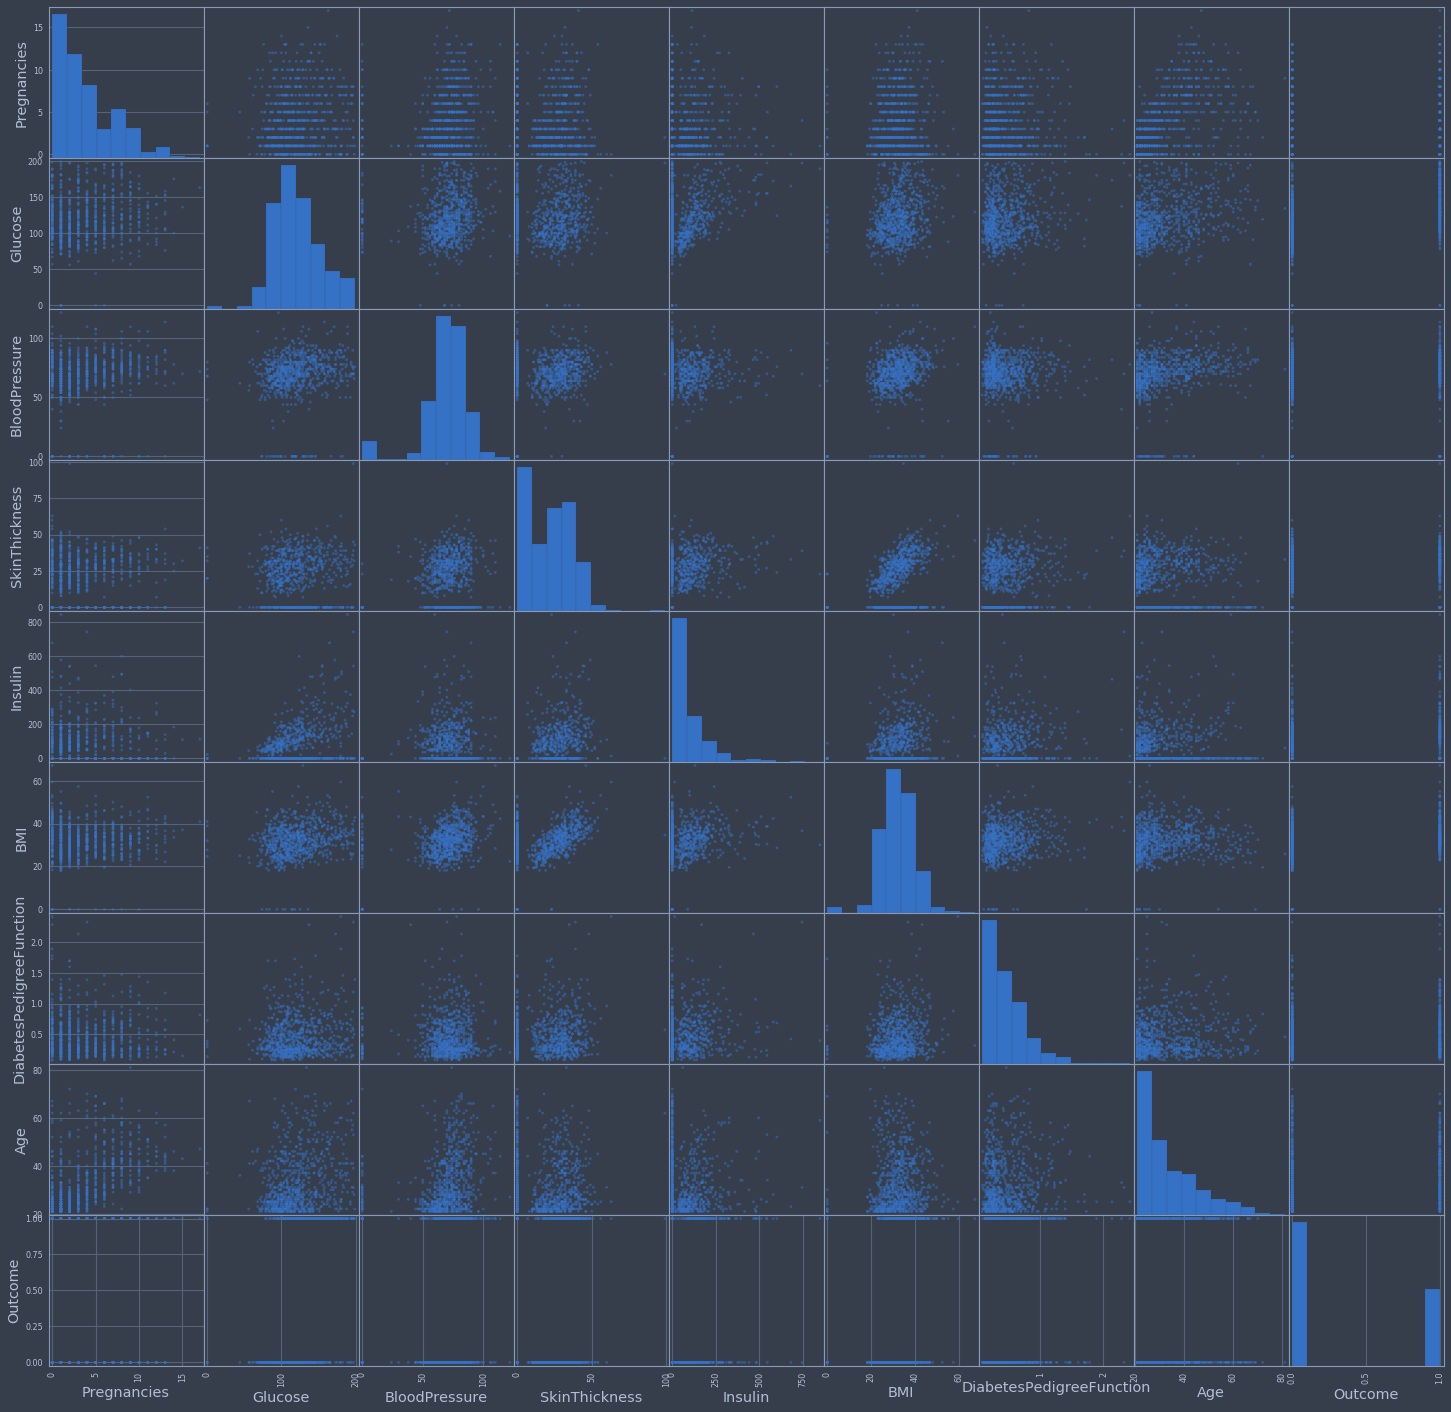

In [16]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

#### Сдвоенный график для очистки данных

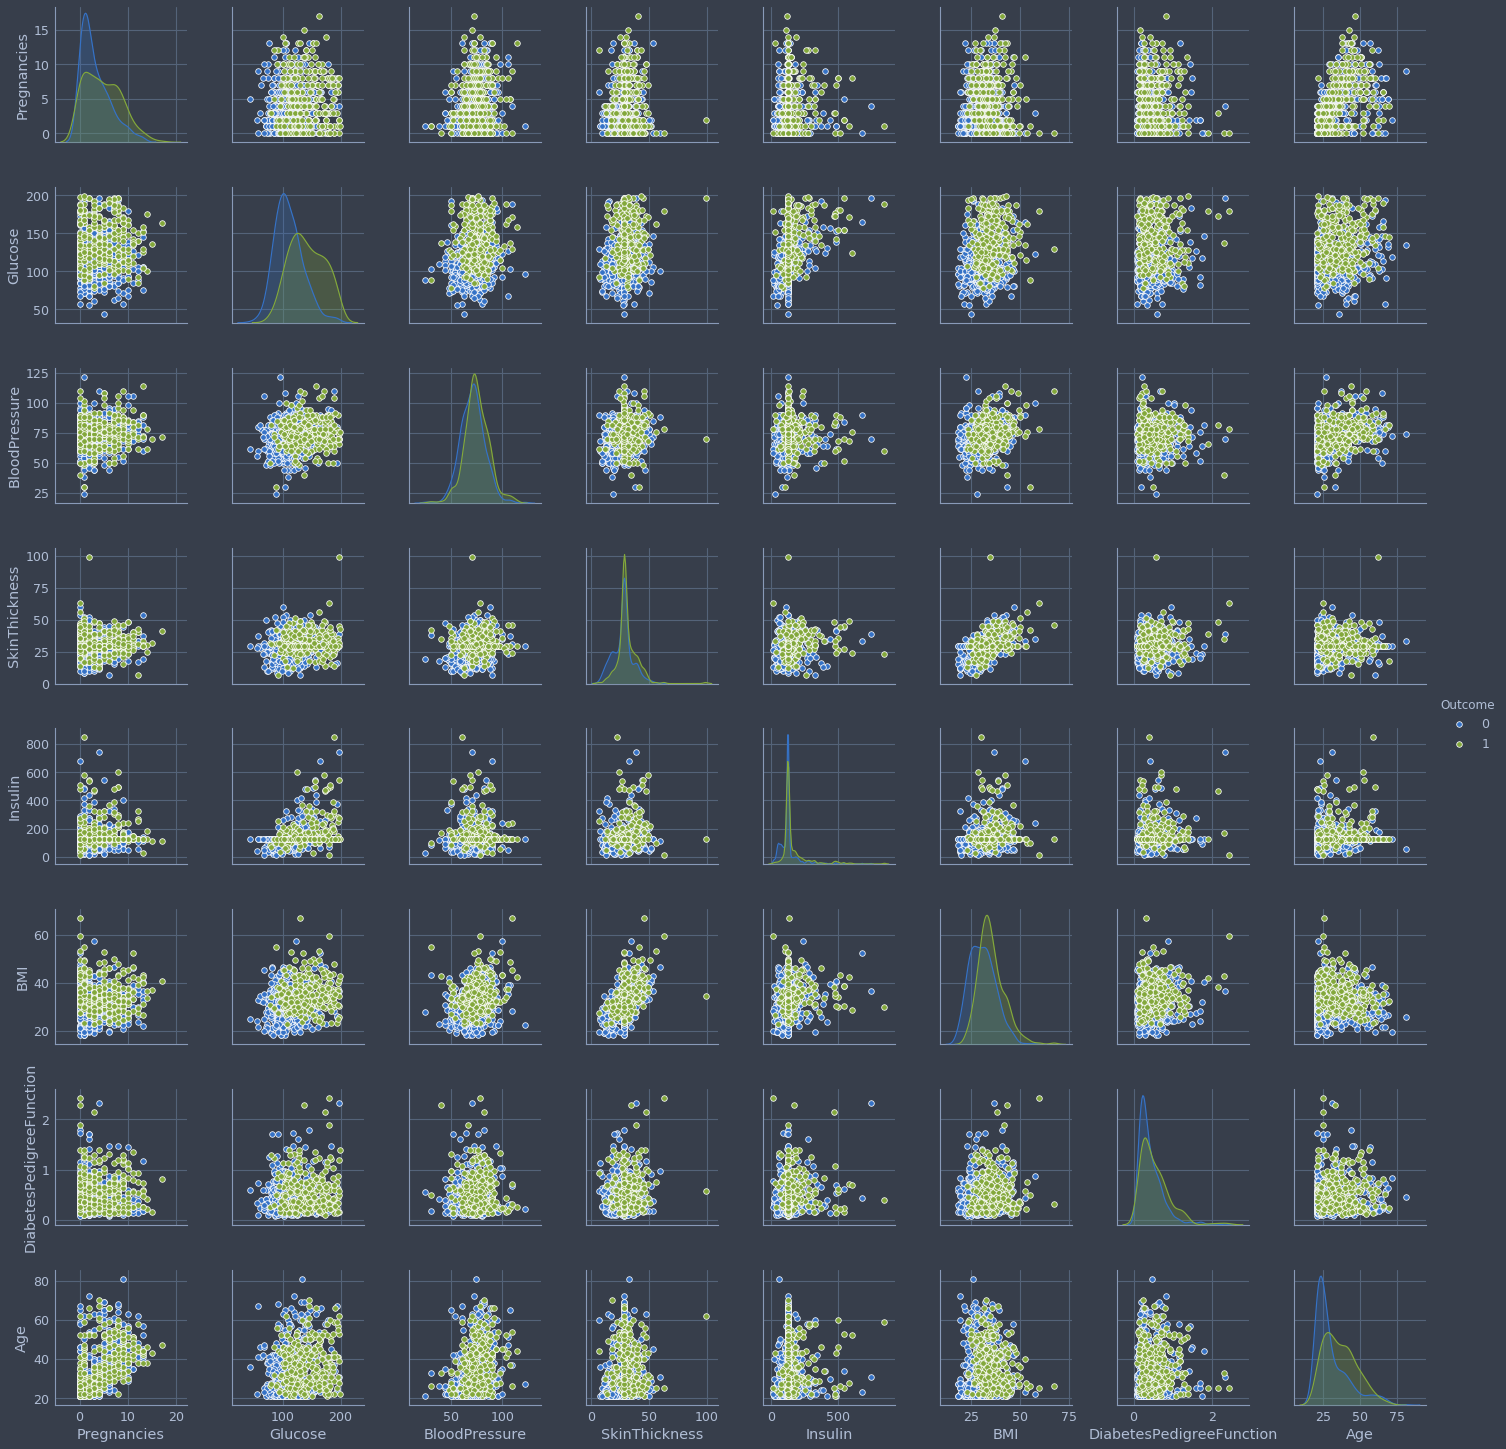

In [17]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

***Коэффициент корреляции Пирсона***: помогает вам выяснить линейную зависимость между двумя величинами. Значение коэффициента корреляции Пирсона может быть от -1 до +1. 1 означает, что они сильно коррелированы, а 0 означает отсутствие корреляции.

Тепловая карта - это двумерное представление информации с помощью цветов. Тепловые карты могут помочь пользователю визуализировать простую или сложную информацию.

#### Тепловая карта загрязнённых данных

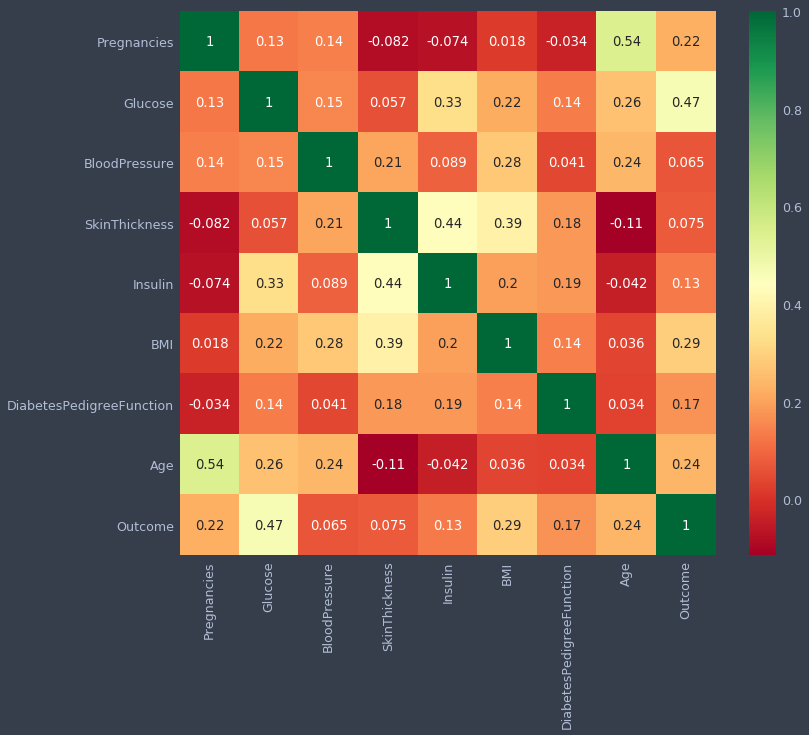

In [18]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

#### Тепловая карта для очищенных данных

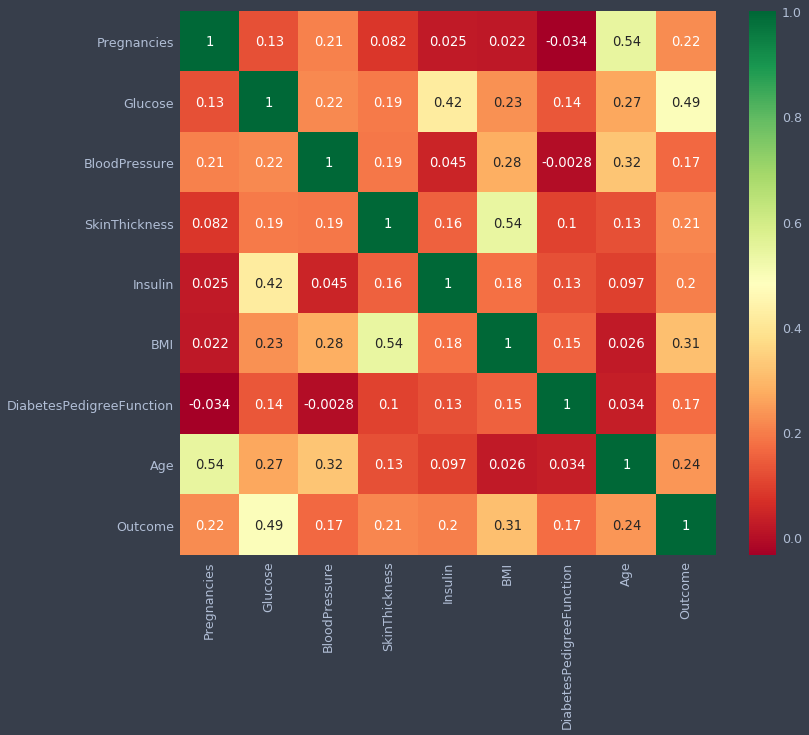

In [19]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data_copy.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

### Нормализация
Нормализуем данные по формуле:
$$z = \frac{x_i - E[x]}{\sigma}$$


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [22]:
#X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data_copy.Outcome

### Test Train разбиение


***Train Test Split*** разбивает данные на обучающую и тетовую подвыборку.

In [23]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

### Сохранение обработанных данных

In [26]:
X_train.to_csv('input/clean_train.csv', index = False)
X_test.to_csv('input/clean_test.csv', index = False)
y_train.to_csv('input/train_target.csv', index = False)
y_test.to_csv('input/test_target.csv', index = False)